In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

### Imported three basic libraries

In [2]:
#Read the data
df = pd.read_csv('C:/Users/DellVostro/Desktop/jupyter_project/CPBA_Course/regressions/kyphosis.csv', header = None)
df.columns = ['kyphosis','age','number','start']
df.head(3)

,kyphosis,age,number,start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5


In [3]:
df.kyphosis.value_counts()

absent     64
present    17
Name: kyphosis, dtype: int64

### 1. train and test data

In [4]:
from sklearn.model_selection import train_test_split
X = df.drop(['kyphosis'], axis=1)
y = df['kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=100)

### 2. Decision Tree:

In [5]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

### 3. Import respective functions 
such as lassification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef

[Text(244.125, 498.3, 'X[2] <= 8.5\ngini = 0.375\nsamples = 56\nvalue = [42, 14]'),
 Text(104.625, 407.70000000000005, 'X[0] <= 8.5\ngini = 0.337\nsamples = 14\nvalue = [3, 11]'),
 Text(69.75, 317.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(139.5, 317.1, 'X[0] <= 141.0\ngini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(104.625, 226.5, 'X[1] <= 3.5\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(69.75, 135.89999999999998, 'X[2] <= 4.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(34.875, 45.299999999999955, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(104.625, 45.299999999999955, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(139.5, 135.89999999999998, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(174.375, 226.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(383.625, 407.70000000000005, 'X[1] <= 4.5\ngini = 0.133\nsamples = 42\nvalue = [39, 3]'),
 Text(279.0, 317.1, 'X[0] <= 148.5\ngini = 0.059\nsamples = 33\nvalue = [32, 1]'),
 Text(244.125, 226.5

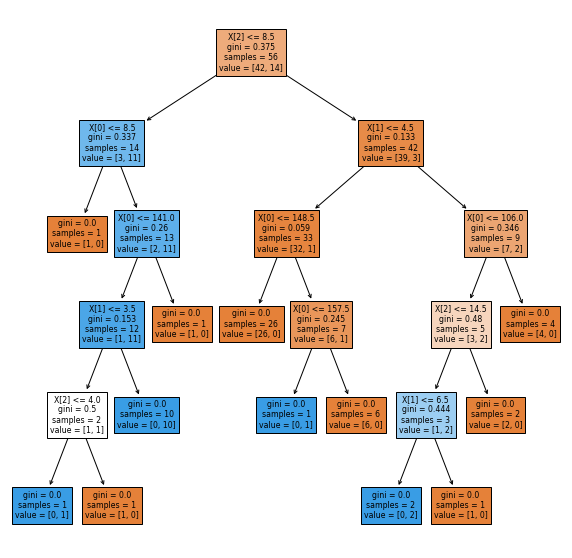

In [6]:
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn import tree

plt.figure(figsize=(10,10))
tree.plot_tree(dtree, filled = True)

In [7]:
from sklearn.metrics import confusion_matrix

missed confusion_matrix

### For Max Depth = 2

Prictions based on X_test: 
 ['absent' 'absent' 'absent' 'absent' 'present' 'absent' 'absent' 'absent'
 'present' 'absent' 'absent' 'absent' 'absent' 'absent' 'absent' 'absent'
 'absent' 'absent' 'absent' 'present' 'absent' 'absent' 'absent' 'absent'
 'present']

Confusion matrix of y_test and predictions of X_test 
 [[18  4]
 [ 3  0]]

Testing data Classification Report: 
               precision    recall  f1-score   support

      absent       0.86      0.82      0.84        22
     present       0.00      0.00      0.00         3

    accuracy                           0.72        25
   macro avg       0.43      0.41      0.42        25
weighted avg       0.75      0.72      0.74        25


Training accuracy:
 0.9107142857142857

Confusion matrix of Training data:
 [[40  2]
 [ 3 11]]

Traing data Classification Report: 
               precision    recall  f1-score   support

      absent       0.93      0.95      0.94        42
     present       0.85      0.79      0.81        14

[Text(195.3, 317.09999999999997, 'X[2] <= 8.5\ngini = 0.375\nsamples = 56\nvalue = [42, 14]'),
 Text(97.65, 190.26, 'X[0] <= 8.5\ngini = 0.337\nsamples = 14\nvalue = [3, 11]'),
 Text(48.825, 63.420000000000016, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(146.47500000000002, 63.420000000000016, 'gini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(292.95000000000005, 190.26, 'X[1] <= 4.5\ngini = 0.133\nsamples = 42\nvalue = [39, 3]'),
 Text(244.125, 63.420000000000016, 'gini = 0.059\nsamples = 33\nvalue = [32, 1]'),
 Text(341.77500000000003, 63.420000000000016, 'gini = 0.346\nsamples = 9\nvalue = [7, 2]')]

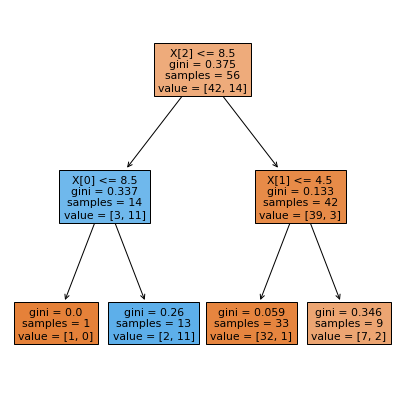

In [8]:
#max_depth = 2
dtree1 = DecisionTreeClassifier(max_depth=2)
dtree1.fit(X_train,y_train)

predictions = dtree1.predict(X_test)
print("Prictions based on X_test: \n",predictions)

conf_matrix = confusion_matrix(y_test, predictions)
print("\nConfusion matrix of y_test and predictions of X_test \n",conf_matrix)

df_report_dtree = classification_report(y_test,predictions)
print("\nTesting data Classification Report: \n",df_report_dtree)

prediction_train = dtree1.predict(X_train)
accuracy_train = accuracy_score(y_train,prediction_train)
# Not interested in output of prediction_train
print("\nTraining accuracy:\n",accuracy_train)

coef_matrix_train = confusion_matrix(y_train, prediction_train)
print("\nConfusion matrix of Training data:\n",coef_matrix_train)

df_report_dtree1 = classification_report(y_train,prediction_train)
print("\nTraing data Classification Report: \n",df_report_dtree1)

plt.figure(figsize=(7,7))
tree.plot_tree(dtree1, filled = True)

### Function: result()
For pretty printing

Prictions based on X_test: 
 ['absent' 'absent' 'absent' 'absent' 'present' 'absent' 'absent' 'absent'
 'present' 'absent' 'absent' 'absent' 'absent' 'absent' 'absent' 'absent'
 'absent' 'absent' 'absent' 'present' 'absent' 'absent' 'absent' 'absent'
 'present']

Confusion matrix of y_test and predictions of X_test 
 [[18  4]
 [ 3  0]]

Testing data Classification Report: 
               precision    recall  f1-score   support

      absent       0.86      0.82      0.84        22
     present       0.00      0.00      0.00         3

    accuracy                           0.72        25
   macro avg       0.43      0.41      0.42        25
weighted avg       0.75      0.72      0.74        25


Training accuracy:
 0.9285714285714286

Confusion matrix of Training data:
 [[41  1]
 [ 3 11]]

Traing data Classification Report: 
               precision    recall  f1-score   support

      absent       0.93      0.98      0.95        42
     present       0.92      0.79      0.85        14

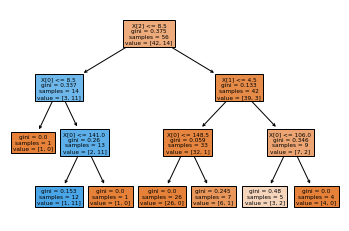

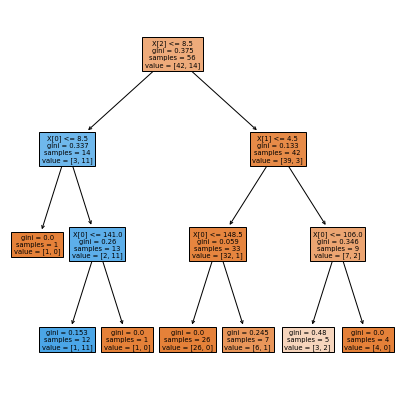

In [29]:
dtree1 = DecisionTreeClassifier(max_depth=3)
dtree1.fit(X_train,y_train)
tree.plot_tree(dtree1, filled = True)

predictions = dtree1.predict(X_test)

# Created funtion name result() for pretty printing.
def result(predictions,y_train,y_test,X_train):

    print("Prictions based on X_test: \n",predictions)

    conf_matrix = confusion_matrix(y_test, predictions)
    print("\nConfusion matrix of y_test and predictions of X_test \n",conf_matrix)

    df_report_dtree = classification_report(y_test,predictions)
    print("\nTesting data Classification Report: \n",df_report_dtree)

    prediction_train = dtree1.predict(X_train)
    accuracy_train = accuracy_score(y_train,prediction_train)
    # Not interested in output of prediction_train
    print("\nTraining accuracy:\n",accuracy_train)

    coef_matrix_train = confusion_matrix(y_train, prediction_train)
    print("\nConfusion matrix of Training data:\n",coef_matrix_train)

    df_report_dtree1 = classification_report(y_train,prediction_train)
    print("\nTraing data Classification Report: \n",df_report_dtree1)

    plt.figure(figsize=(7,7))
    tree.plot_tree(dtree1, filled = True)
    

result(predictions,y_train,y_test,X_train)

#### Testing result() function-

Prictions based on X_test: 
 ['absent' 'absent' 'absent' 'absent' 'present' 'absent' 'absent' 'absent'
 'present' 'absent' 'absent' 'absent' 'absent' 'absent' 'absent' 'absent'
 'absent' 'absent' 'absent' 'present' 'absent' 'absent' 'absent' 'absent'
 'present']

Confusion matrix of y_test and predictions of X_test 
 [[18  4]
 [ 3  0]]

Testing data Classification Report: 
               precision    recall  f1-score   support

      absent       0.86      0.82      0.84        22
     present       0.00      0.00      0.00         3

    accuracy                           0.72        25
   macro avg       0.43      0.41      0.42        25
weighted avg       0.75      0.72      0.74        25


Training accuracy:
 0.9642857142857143

Confusion matrix of Training data:
 [[41  1]
 [ 1 13]]

Traing data Classification Report: 
               precision    recall  f1-score   support

      absent       0.98      0.98      0.98        42
     present       0.93      0.93      0.93        14

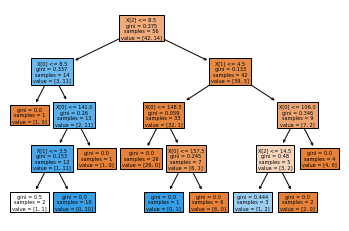

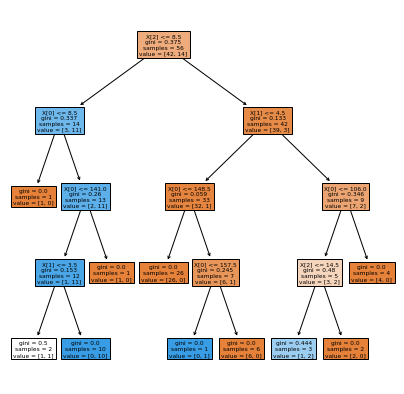

In [27]:
#max_depth = 3
dtree1 = DecisionTreeClassifier(max_depth=4)
dtree1.fit(X_train,y_train)
#tree.plot_tree(dtree1, filled = True)

'''
predictions = dtree1.predict(X_test)
print(predictions)

conf_matrix = confusion_matrix(y_test, predictions)
print(conf_matrix)

df_report_dtree = classification_report(y_test,predictions)
print(df_report_dtree)

prediction_train = dtree1.predict(X_train)
accuracy_train = accuracy_score(y_train,prediction_train)
print(accuracy_train)

coef_matrix_train = confusion_matrix(y_train, prediction_train)

print(coef_matrix_train)
'''

result(predictions,y_train,y_test,X_train)

### For max_depth = 1, criterion = 'entropy'

Prictions based on X_test: 
 ['absent' 'absent' 'absent' 'absent' 'present' 'absent' 'absent' 'absent'
 'present' 'absent' 'absent' 'absent' 'absent' 'present' 'absent' 'absent'
 'absent' 'absent' 'absent' 'present' 'absent' 'absent' 'absent' 'absent'
 'present']

Confusion matrix of y_test and predictions of X_test 
 [[17  5]
 [ 3  0]]

Testing data Classification Report: 
               precision    recall  f1-score   support

      absent       0.85      0.77      0.81        22
     present       0.00      0.00      0.00         3

    accuracy                           0.68        25
   macro avg       0.42      0.39      0.40        25
weighted avg       0.75      0.68      0.71        25


Training accuracy:
 0.8928571428571429

Confusion matrix of Training data:
 [[39  3]
 [ 3 11]]

Traing data Classification Report: 
               precision    recall  f1-score   support

      absent       0.93      0.93      0.93        42
     present       0.79      0.79      0.79        1

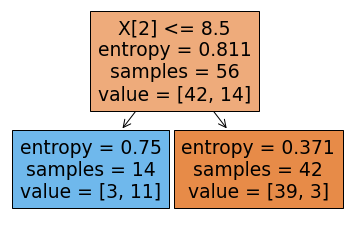

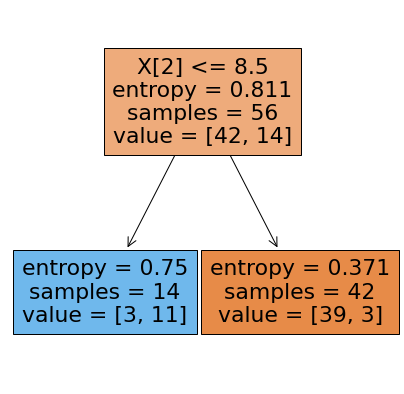

In [30]:
#max_depth = 1, for entropy
dtree1 = DecisionTreeClassifier(max_depth=1, criterion = 'entropy')
dtree1.fit(X_train,y_train)
#tree.plot_tree(dtree1, filled = True)

predictions = dtree1.predict(X_test)

result(predictions,y_train,y_test,X_train)

Prictions based on X_test: 
 ['absent' 'absent' 'absent' 'absent' 'present' 'absent' 'absent' 'absent'
 'present' 'absent' 'absent' 'absent' 'absent' 'absent' 'absent' 'absent'
 'absent' 'absent' 'absent' 'present' 'absent' 'absent' 'absent' 'absent'
 'present']

Confusion matrix of y_test and predictions of X_test 
 [[18  4]
 [ 3  0]]

Testing data Classification Report: 
               precision    recall  f1-score   support

      absent       0.86      0.82      0.84        22
     present       0.00      0.00      0.00         3

    accuracy                           0.72        25
   macro avg       0.43      0.41      0.42        25
weighted avg       0.75      0.72      0.74        25


Training accuracy:
 0.9107142857142857

Confusion matrix of Training data:
 [[40  2]
 [ 3 11]]

Traing data Classification Report: 
               precision    recall  f1-score   support

      absent       0.93      0.95      0.94        42
     present       0.85      0.79      0.81        14

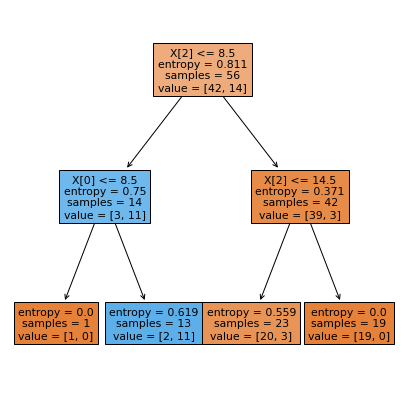

In [32]:
#max_depth = 2, for entropy
dtree1 = DecisionTreeClassifier(max_depth=2, criterion = 'entropy')
dtree1.fit(X_train,y_train)
#tree.plot_tree(dtree1, filled = True)

predictions = dtree1.predict(X_test)
result(predictions,y_train,y_test,X_train)

Prictions based on X_test: 
 ['absent' 'absent' 'absent' 'absent' 'present' 'absent' 'absent' 'absent'
 'present' 'absent' 'absent' 'absent' 'absent' 'absent' 'absent' 'absent'
 'absent' 'absent' 'absent' 'present' 'absent' 'absent' 'absent' 'absent'
 'present']

Confusion matrix of y_test and predictions of X_test 
 [[18  4]
 [ 3  0]]

Testing data Classification Report: 
               precision    recall  f1-score   support

      absent       0.86      0.82      0.84        22
     present       0.00      0.00      0.00         3

    accuracy                           0.72        25
   macro avg       0.43      0.41      0.42        25
weighted avg       0.75      0.72      0.74        25


Training accuracy:
 0.9285714285714286

Confusion matrix of Training data:
 [[41  1]
 [ 3 11]]

Traing data Classification Report: 
               precision    recall  f1-score   support

      absent       0.93      0.98      0.95        42
     present       0.92      0.79      0.85        14

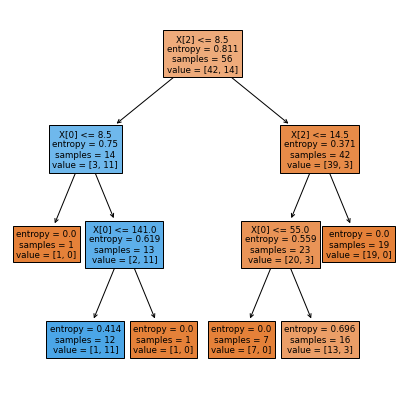

In [33]:
#max_depth = 3, for entropy
dtree1 = DecisionTreeClassifier(max_depth=3, criterion = 'entropy')
dtree1.fit(X_train,y_train)
#tree.plot_tree(dtree1, filled = True)

predictions = dtree1.predict(X_test)
result(predictions,y_train,y_test,X_train)

#### Ploting Iris data-

Automatically created module for IPython interactive environment


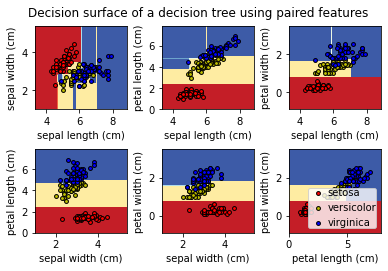

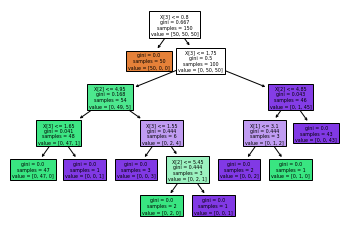

In [14]:
# Plot the decision surface of a decision tree on the iris dataset:

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()